In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


# 1. 데이터 불러오기
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")  # 파일 경로에 맞게 수정
# BMI 계산
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [6]:
# 1. 변수만 선택
cluster_vars = ['BMI', 'Weight', 'Gender', 'FCVC', 'Height', 'Age', 
                'NCP', 'CH2O', 'TUE', 'CAEC', 
                'family_history_with_overweight', 'FAF', 'CALC']

# 2. 범주형 인코딩 (간단하게 처리)
for col in ['Gender', 'CAEC', 'family_history_with_overweight', 'CALC']:
    data[col] = LabelEncoder().fit_transform(data[col])

# 3. 스케일링 + 클러스터링
scaler = StandardScaler()
X = scaler.fit_transform(data[cluster_vars])


In [8]:
# Categorical value into numerical values using one-hot encoding or label encoding.
le = LabelEncoder()
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [10]:
pip install scikit-learn-extra


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn_extra.cluster import KMedoids

# 데이터 불러오기
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

# 사용할 변수
cluster_vars = ['BMI', 'Weight', 'Gender', 'FCVC', 'Height', 'Age',
                'NCP', 'CH2O', 'TUE', 'CAEC', 'family_history_with_overweight', 'FAF', 'CALC']

# 범주형 변수 인코딩
for col in ['Gender', 'CAEC', 'family_history_with_overweight', 'CALC']:
    data[col] = LabelEncoder().fit_transform(data[col])

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(data[cluster_vars])

# ✅ KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=4, random_state=42)
data["cluster"] = kmedoids.fit_predict(X)

# 클러스터별 요약
summary = data.groupby("cluster")[cluster_vars].mean().round(2)
print(summary)


           BMI  Weight  Gender  FCVC  Height    Age   NCP  CH2O   TUE  CAEC  \
cluster                                                                       
0        26.18   75.19    0.54  2.50    1.69  23.64  2.51  2.48  0.94  1.86   
1        25.69   72.10    0.48  2.13    1.67  23.22  2.44  1.53  0.59  1.79   
2        26.14   75.34    0.56  2.47    1.70  26.62  3.10  1.93  0.55  1.76   
3        39.29  119.35    0.48  2.67    1.74  25.31  2.97  2.20  0.53  1.99   

         family_history_with_overweight   FAF  CALC  
cluster                                              
0                                  0.77  1.47  2.34  
1                                  0.71  1.02  2.36  
2                                  0.79  0.36  2.37  
3                                  1.00  0.85  2.06  


🧭 빠진 변수들 (즉, 우리가 사용하지 않은 변수들)

변수	이유
SCC (단 음료 섭취)	🎯 랜덤포레스트 중요도 낮음 (< 0.01)
SMOKE (흡연)	🎯 거의 영향 없음으로 나타남
FAVC (고열량 음식 자주 섭취)	중요도 낮고 FCVC, CALC에 중복 정보
MTRANS (교통수단)	🚌 개인 행동보다 일반성 높음, 거리 기반 모델에 영향 작음
NObeyesdad	🎯 target label → 클러스터링에는 사용 ❌

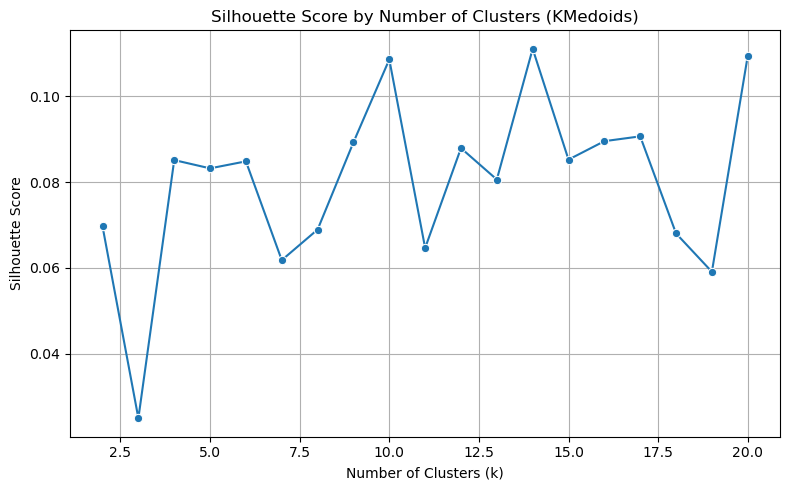

Silhouette scores: {2: 0.06967756337675114, 3: 0.024920366180526596, 4: 0.08515179740235714, 5: 0.08322166324913798, 6: 0.0848558423642208, 7: 0.06180609439858064, 8: 0.06894307665370349, 9: 0.08929456598993848, 10: 0.10863010493394386, 11: 0.06464421139916542, 12: 0.08794156960049354, 13: 0.0806125418851812, 14: 0.11111315949565775, 15: 0.08526316161632795, 16: 0.08956464473924705, 17: 0.09068699965206975, 18: 0.06803207523323324, 19: 0.059090528270377175, 20: 0.10948104145899082}


In [13]:
#!pip install scikit-learn-extra

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 전처리
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

# 사용할 변수
cluster_vars = ['BMI', 'Weight', 'Gender', 'FCVC', 'Height', 'Age',
                'NCP', 'CH2O', 'TUE', 'CAEC', 'family_history_with_overweight', 'FAF', 'CALC']

# 범주형 변수 인코딩
for col in ['Gender', 'CAEC', 'family_history_with_overweight', 'CALC']:
    data[col] = LabelEncoder().fit_transform(data[col])

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(data[cluster_vars])

# 클러스터 수 범위 테스트 (2~7까지)
silhouette_scores = {}
for k in range(2, 21):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    labels = kmedoids.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score

# 시각화
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Score by Number of Clusters (KMedoids)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Silhouette scores:", silhouette_scores)


In [35]:
import numpy as np

n_clusters=10
# 클러스터 10개로 설정
kmedoids = KMedoids(n_clusters=10, random_state=42)
data["cluster"] = kmedoids.fit_predict(X)

# ✅ 클러스터 중심 좌표 저장
centroids = kmedoids.cluster_centers_
np.save("data/processed/cluster_centroids.npy", centroids)

print(f"✅ 클러스터 중심 {n_clusters}개 저장 완료: cluster_centroids.npy")

# 클러스터별 요약 출력
summary = data.groupby("cluster")[cluster_vars].mean().round(2)
print(summary)

✅ 클러스터 중심 10개 저장 완료: cluster_centroids.npy
           BMI  Weight  Gender  FCVC  Height    Age   NCP  CH2O   TUE  CAEC  \
cluster                                                                       
0        26.57   68.78    0.03  2.35    1.61  31.51  2.41  1.51  0.28  1.79   
1        34.56  112.33    1.00  2.21    1.80  27.52  2.90  2.14  0.18  1.98   
2        28.07   84.31    0.94  2.55    1.74  23.88  2.34  1.45  0.52  1.80   
3        25.16   72.27    0.85  2.00    1.70  22.84  2.70  2.24  0.12  1.98   
4        23.62   62.18    0.01  2.69    1.62  20.62  2.48  2.07  0.73  1.69   
5        22.97   65.77    0.60  1.91    1.69  20.62  2.82  1.88  1.58  1.73   
6        29.32   86.57    0.85  1.97    1.72  22.59  2.30  2.24  0.99  1.92   
7        24.43   74.02    0.81  2.17    1.74  21.08  3.00  2.16  1.15  1.81   
8        34.83  113.72    1.00  2.53    1.81  27.87  2.80  2.32  1.18  1.93   
9        42.05  120.14    0.00  2.99    1.69  23.65  2.99  2.22  0.60  2.00   

        

In [15]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI,cluster
0,21.0,0,1.62,64.0,3,no,2.0,3.0,no,no,2.0,1,0.0,1.0,2,Public_Transportation,Normal_Weight,24.386526,5
1,21.0,0,1.52,56.0,2,no,3.0,3.0,yes,yes,3.0,1,3.0,0.0,2,Public_Transportation,Normal_Weight,24.238227,4
2,23.0,1,1.80,77.0,1,no,2.0,3.0,no,no,2.0,1,2.0,1.0,2,Public_Transportation,Normal_Weight,23.765432,2
3,27.0,1,1.80,87.0,1,no,3.0,3.0,no,no,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,26.851852,2
4,22.0,1,1.78,89.8,2,no,2.0,1.0,no,no,2.0,0,0.0,0.0,2,Public_Transportation,Overweight_Level_II,28.342381,2


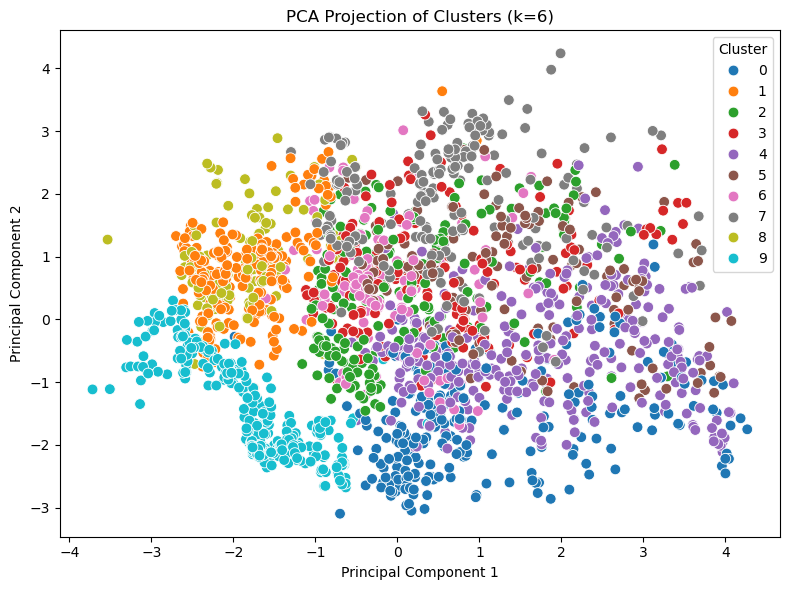

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# PCA 2D 변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화용 데이터 프레임
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = data["cluster"]

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="tab10", s=60)
plt.title("PCA Projection of Clusters (k=6)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

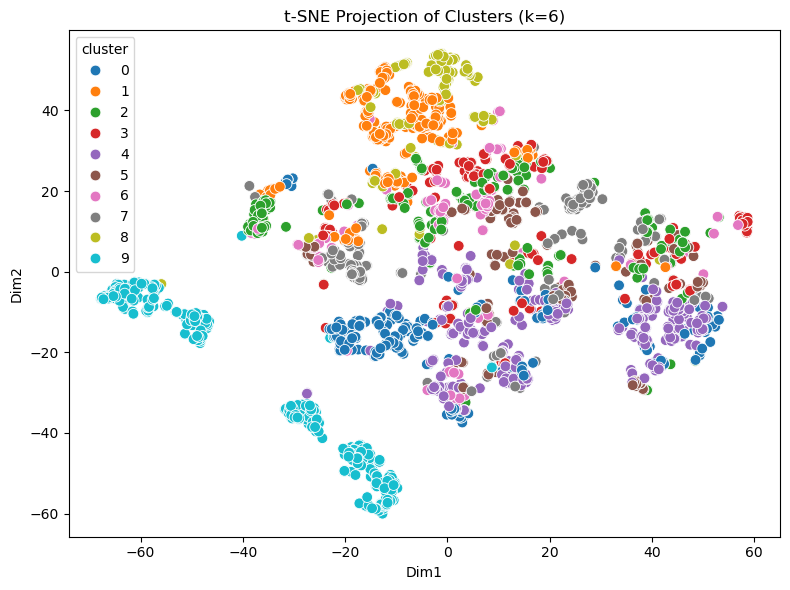

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["cluster"] = data["cluster"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="Dim1", y="Dim2", hue="cluster", palette="tab10", s=60)
plt.title("t-SNE Projection of Clusters (k=6)")
plt.tight_layout()
plt.show()


In [24]:
# 클러스터별 평균 계산
cluster_means = data.groupby("cluster")[cluster_vars].mean().round(2)

# 요약문 생성
summaries = []
for i in range(10):
    row = cluster_means.loc[i]
    summary = (
        f"Cluster {i}: 평균 BMI는 {row['BMI']}이며, 체중은 {row['Weight']}kg, "
        f"야채 섭취 빈도(FCVC)는 {row['FCVC']}회, 하루 식사 수(NCP)는 {row['NCP']}회, "
        f"기술 사용 시간(TUE)은 {row['TUE']}시간, 물 섭취량은 {row['CH2O']}리터, "
        f"운동 빈도(FAF)는 {row['FAF']}회, 간식 섭취 빈도(CAEC)는 {row['CAEC']}, 음주 빈도(CALC)는 {row['CALC']}, "
        f"과체중 가족력 비율은 {row['family_history_with_overweight']}입니다."
    )
    summaries.append(summary)

# 요약문 출력
for s in summaries:
    print(s + "\n")

Cluster 0: 평균 BMI는 26.57이며, 체중은 68.78kg, 야채 섭취 빈도(FCVC)는 2.35회, 하루 식사 수(NCP)는 2.41회, 기술 사용 시간(TUE)은 0.28시간, 물 섭취량은 1.51리터, 운동 빈도(FAF)는 0.54회, 간식 섭취 빈도(CAEC)는 1.79, 음주 빈도(CALC)는 2.37, 과체중 가족력 비율은 0.74입니다.

Cluster 1: 평균 BMI는 34.56이며, 체중은 112.33kg, 야채 섭취 빈도(FCVC)는 2.21회, 하루 식사 수(NCP)는 2.9회, 기술 사용 시간(TUE)은 0.18시간, 물 섭취량은 2.14리터, 운동 빈도(FAF)는 1.18회, 간식 섭취 빈도(CAEC)는 1.98, 음주 빈도(CALC)는 2.08, 과체중 가족력 비율은 0.99입니다.

Cluster 2: 평균 BMI는 28.07이며, 체중은 84.31kg, 야채 섭취 빈도(FCVC)는 2.55회, 하루 식사 수(NCP)는 2.34회, 기술 사용 시간(TUE)은 0.52시간, 물 섭취량은 1.45리터, 운동 빈도(FAF)는 1.12회, 간식 섭취 빈도(CAEC)는 1.8, 음주 빈도(CALC)는 2.33, 과체중 가족력 비율은 0.78입니다.

Cluster 3: 평균 BMI는 25.16이며, 체중은 72.27kg, 야채 섭취 빈도(FCVC)는 2.0회, 하루 식사 수(NCP)는 2.7회, 기술 사용 시간(TUE)은 0.12시간, 물 섭취량은 2.24리터, 운동 빈도(FAF)는 1.04회, 간식 섭취 빈도(CAEC)는 1.98, 음주 빈도(CALC)는 2.19, 과체중 가족력 비율은 0.66입니다.

Cluster 4: 평균 BMI는 23.62이며, 체중은 62.18kg, 야채 섭취 빈도(FCVC)는 2.69회, 하루 식사 수(NCP)는 2.48회, 기술 사용 시간(TUE)은 0.73시간, 물 섭취량은 2.07리터, 운동 빈도(FAF)는 1.31회, 간식 섭취 빈도(CAEC)는 1.69, 음주 빈도(CALC)는 2.36, 

In [29]:
summaries

['Cluster 0: 평균 BMI는 26.57이며, 체중은 68.78kg, 야채 섭취 빈도(FCVC)는 2.35회, 하루 식사 수(NCP)는 2.41회, 기술 사용 시간(TUE)은 0.28시간, 물 섭취량은 1.51리터, 운동 빈도(FAF)는 0.54회, 간식 섭취 빈도(CAEC)는 1.79, 음주 빈도(CALC)는 2.37, 과체중 가족력 비율은 0.74입니다.',
 'Cluster 1: 평균 BMI는 34.56이며, 체중은 112.33kg, 야채 섭취 빈도(FCVC)는 2.21회, 하루 식사 수(NCP)는 2.9회, 기술 사용 시간(TUE)은 0.18시간, 물 섭취량은 2.14리터, 운동 빈도(FAF)는 1.18회, 간식 섭취 빈도(CAEC)는 1.98, 음주 빈도(CALC)는 2.08, 과체중 가족력 비율은 0.99입니다.',
 'Cluster 2: 평균 BMI는 28.07이며, 체중은 84.31kg, 야채 섭취 빈도(FCVC)는 2.55회, 하루 식사 수(NCP)는 2.34회, 기술 사용 시간(TUE)은 0.52시간, 물 섭취량은 1.45리터, 운동 빈도(FAF)는 1.12회, 간식 섭취 빈도(CAEC)는 1.8, 음주 빈도(CALC)는 2.33, 과체중 가족력 비율은 0.78입니다.',
 'Cluster 3: 평균 BMI는 25.16이며, 체중은 72.27kg, 야채 섭취 빈도(FCVC)는 2.0회, 하루 식사 수(NCP)는 2.7회, 기술 사용 시간(TUE)은 0.12시간, 물 섭취량은 2.24리터, 운동 빈도(FAF)는 1.04회, 간식 섭취 빈도(CAEC)는 1.98, 음주 빈도(CALC)는 2.19, 과체중 가족력 비율은 0.66입니다.',
 'Cluster 4: 평균 BMI는 23.62이며, 체중은 62.18kg, 야채 섭취 빈도(FCVC)는 2.69회, 하루 식사 수(NCP)는 2.48회, 기술 사용 시간(TUE)은 0.73시간, 물 섭취량은 2.07리터, 운동 빈도(FAF)는 1.31회, 간식 섭취 빈도(CAEC)는 1.69, 음주 빈도

✅ 클러스터 10개 분석 요약 (빠르게 정리해줄게)

클러스터	특징	해석

Cluster 0	BMI 26.5 / 활동 낮음 / 가족력 0.74	🟡 과체중 가능성 있음

Cluster 1	BMI 34.5 / 고도비만 / 가족력 0.99	🔴 치료 개입 필요

Cluster 2	BMI 28.0 / 중간 위험 / 활동 낮음	🟠 감시 필요

Cluster 3	BMI 25.1 / 수분 충분 / 활동 중간	🟢 건강 습관 유지

Cluster 4	BMI 23.6 / 활동 많음 / 가족력 낮음	✅ 이상적 프로파일

Cluster 5	BMI 22.9 / 활동 거의 없음 / 기기 사용 많음	🟡 위험 가능성 있음

Cluster 6	BMI 29.3 / 가족력 0.92 / 활동 낮음	🔶 고위험군 경계선

Cluster 7	BMI 24.4 / 운동 많고 식사 균형 / 가족력 높음	🟢 저위험 but 가족력

Cluster 8	BMI 34.8 / 체중 113kg / 가족력 0.98	🔴 고도비만 + 고위험군

Cluster 9	BMI 42.0 / 체중 120kg / 가족력 1.0	🔴 최고위험군 (치료 필수)
